In [1]:
#Importamos el modulo de Google Drive
#from google.colab import drive
#MOntamos la carpeta content de Drive
#drive.mount("/content/drive")
#Asignamos la ruta donde se encuentra nuestro dataset
#archivo="/content/drive/MyDrive/data/Iris.csv"
archivo = "C:/Users/TOSHIBA/Desktop/INF - 354/Segundo Parcial/P1/Iris.csv"
#importamos la libreria random
import random
#importamos la libreria csv
import csv
#Importaremos pandas solamente para observar el dataset
import pandas as pd
#Importaremos la libreria numpy
import numpy as np
#Importamos la libreria matplotlib para graficar
import matplotlib.pyplot as plt
#Importamos la libreria de sklearn para hacer el train test split
from sklearn.model_selection import train_test_split
#Utilizaremos la libreria para convertir a one hot encoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv(archivo)
#Mostramos el dataset Iris
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#funcion para obtener X y y
def obtenerDatos(ruta):
  #X tendra los registros menos la columna de la variable objetivo similar a iris.data
  X = []
  #Almacenara los registros de los tipos de flor similar a iris.target
  y = []
  with open(ruta, 'r', newline='') as dataset:
    lector_csv = csv.reader(dataset)

    # Leemos cada fila del archivo CSV
    for fila in lector_csv:
        # Agregamos todas las columnas excepto la última a X
        X.append(fila[1:-1])
        # Agregamos la última columna a y
        y.append(fila[-1])
    #Eliminamos las cabeceras y convertimos los datos a float
    X = [[float(elemento) for elemento in fila] for fila in X[1:]]
    #Eliminamos las cabeceras
    y = y[1:]
    #vamos a cambiar la etiquetas al estandar label encoder
    le = []
    for i in range(len(y)):
      if(y[i] == "Iris-setosa"):
        le.append(0)
      elif(y[i] == "Iris-virginica"):
        le.append(1)
      elif(y[i] == "Iris-versicolor"):
        le.append(2)
    return X, le

#En X almancenaremos los registros del dataset
#en y almacenaremos la variable objetivo del dataset
X,y =  obtenerDatos(archivo)
#Mostramos X
print(X)
#Mostramos y
print(y)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

In [4]:
#Funcion para realizar la normalizacion utilizando la norma euclideana L2
def normalizar(X, order = 2, axis = -1):
  #calculamos la norma l2
  l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
  #si la norma calculada es 0 se cambia a 1 para evitar la division entre 0
  l2[l2 == 0] = 1
  #retornamos el array normalizado dividiendo cada elemento por su norma calculada
  return X / np.expand_dims(l2, axis)

def convertir_a_one_hot(array):
  # Reshape el array a una matriz de una sola columna
  reshape = np.array(array).reshape(-1, 1)
  # Crear una instancia del OneHotEncoder
  encoder = OneHotEncoder(sparse=False, categories='auto')
  # Ajustar y transformar el array
  array_one_hot = encoder.fit_transform(reshape)
  return array_one_hot

In [5]:
X = normalizar(X)
y = convertir_a_one_hot(y)
print(X)
print(y)

[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.786991   0.55745196 0.26233033 0.03279129]
 [0.82307218 0.51442011 0.24006272 0.01714734]
 [0.8025126  0.55989251 0.20529392 0.01866308]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.77381111 0.59732787 0.2036345  0.05430253]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.80327412 0.55126656 0.22050662 0.04725142]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.8173379  0.51462016 0.25731008 0.03027177]
 [0.78591858 

C:\Users\TOSHIBA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
#Definimos la proporcion del 80% para entrenamiento
proporcion_entrenamiento = 0.8
#Definimos la proporcion del 20% para prueba
proporcion_prueba = 0.2
#Cantidad de registros del dataset
muestras = 150
#definimos los indices
indices = list(range(muestras))
#mezclamos los indices dentro de la lista
random.shuffle(indices)
#cantidad de muestras para train
num_train = int(muestras * proporcion_entrenamiento)
#cantidad de muestras para test
num_test = int(muestras * proporcion_prueba)
#indices para entrenamieto
train_indices = indices[:num_train]
#indices para prueba
test_indices = indices[:num_test]
#Obtenemos los datos de entrenamiento y de prueba para X y y
X_train = [X[i] for i in train_indices]
y_train = [y[i] for i in train_indices]
X_test = [X[i] for i in test_indices]
y_test = [y[i] for i in test_indices]
print("X_train")
X_train = np.array(X_train)
print(X_train)
print("y_train")
y_train = np.array(y_train)
print(y_train)
print("X_test")
X_test = np.array(X_test)
print(X_test)
print("y_test")
y_test = np.array(y_test)
print(y_test)

X_train
[[0.78889479 0.55222635 0.25244633 0.09466737]
 [0.78591858 0.57017622 0.23115252 0.06164067]
 [0.73089855 0.30454106 0.58877939 0.1624219 ]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.76467269 0.31486523 0.53976896 0.15743261]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.73122464 0.31338199 0.56873028 0.20892133]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.75676497 0.35228714 0.53495455 0.13047672]
 [0.8025126  0.55989251 0.20529392 0.01866308]
 [0.70953708 0.28008043 0.61617694 0.1960563 ]
 [0.77011854 0.35349703 0.50499576 0.16412362]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.67054118 0.34211284 0.61580312 0.23263673]
 [0.75911707 0.3931142  0.48800383 0.17622361]
 [0.79594782 0.55370283 0.24224499 0.03460643]
 [0.80779568 0.53853046 0.23758697 0.03167826]
 [0.71576546 0.30196356 0.59274328 0.21249287]
 [0.82647451 0.4958847  0.26447184 0.03305898]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.7

In [7]:
#Definimos los pesos que tendra la red neuronal
#Pesos
w0 = 2*np.random.random((4, 5)) - 1
w1 = 2*np.random.random((5, 3)) - 1
#Definimos la tasa de aprendizaje
tasa_aprendizaje = 0.1
#Creamos un array donde se almacenaran los valores de error del entrenamiento
errors = []
accuracy = []

In [8]:
#La función sigmoide comprime los valores en el rango de 0 a 1
#se utiliza comúnmente en problemas de clasificación binaria
#y como función de activación en redes neuronales.
def sigmoide(x):
    return 1/(1+np.exp(-x))
#Esta derivada es útil en algoritmos de aprendizaje automático, especialmente
#en el entrenamiento de redes neuronales mediante el algoritmo de
#backpropagation
def derivada_sigmoide(x):
    return sigmoide(x)*(1 - sigmoide(x))

Epoca: 1 Error: 0.5140712664471424 Precision: 48.59287335528576 %
Epoca: 2 Error: 0.46283034315593125 Precision: 53.71696568440687 %
Epoca: 3 Error: 0.4470402451748507 Precision: 55.295975482514926 %
Epoca: 4 Error: 0.4430436896659043 Precision: 55.695631033409576 %
Epoca: 5 Error: 0.44165143824120445 Precision: 55.83485617587955 %
Epoca: 6 Error: 0.44082804317629687 Precision: 55.91719568237031 %
Epoca: 7 Error: 0.4400973400184627 Precision: 55.99026599815373 %
Epoca: 8 Error: 0.43933593323627773 Precision: 56.066406676372225 %
Epoca: 9 Error: 0.43850028328234125 Precision: 56.149971671765876 %
Epoca: 10 Error: 0.43756400447162996 Precision: 56.243599552837 %
Epoca: 11 Error: 0.43650316165265807 Precision: 56.3496838347342 %
Epoca: 12 Error: 0.43529263911667326 Precision: 56.47073608833267 %
Epoca: 13 Error: 0.4339051233373422 Precision: 56.60948766626578 %
Epoca: 14 Error: 0.4323107727823716 Precision: 56.768922721762834 %
Epoca: 15 Error: 0.43047716361525123 Precision: 56.9522836384

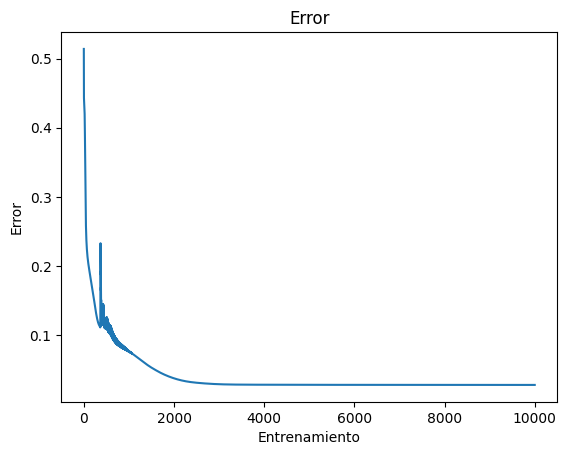

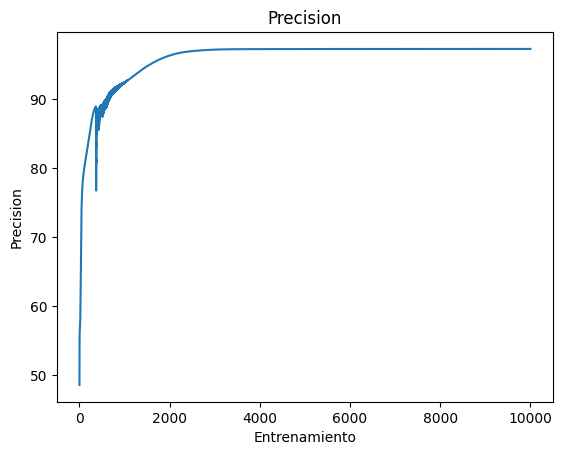

Precision del modelo 97.23%


In [9]:
#Declaramos el numero de epocas
epocas = 10000
for i in range(epocas):
  #Datos de entrada
  capa_0 = X_train
  #Primera capa efectuamos el producto punto entre los valores de entrada y el peso w0
  #Ademas se aplica la funcion de activacion sigmoide
  primera_capa = sigmoide(np.dot(capa_0, w0))
  #Segunda capa efectuamos el producto punto entre la salida de la anterior capa y el peso w1
  #Ademas se aplica la funcion de activacion sigmoide
  segunda_capa = sigmoide(np.dot(primera_capa, w1))
  #ralizamos el algoritmo de backpropagation
  #calculamos el error de la segunda capa
  segunda_capa_error = y_train - segunda_capa
  #calculamos el descendo de la gradiente multiplicando el error por la derivada de la segunda capa
  segunda_capa_delta = segunda_capa_error * derivada_sigmoide(segunda_capa)
  #Calculamos el error de la primera capa
  primera_capa_error = segunda_capa_delta.dot(w1.T)
  #calculamos el descendo de la gradiente multiplicando el error por la derivada de la primera capa
  primera_capa_delta = primera_capa_error * derivada_sigmoide(primera_capa)
  #Actualizamos el valor del peso w1
  w1 += primera_capa.T.dot(segunda_capa_delta) * tasa_aprendizaje
  #Actualizamos el valor del peso w0
  w0 += capa_0.T.dot(primera_capa_delta) * tasa_aprendizaje
  #Calculamos el error medio
  error = np.mean(np.abs(segunda_capa_error))
  #añadimos el error encontrado a nuestro array de errores
  errors.append(error)
  #calculamos la precision del modelo
  precision = (1 - error) * 100
  #añadimos la precision a nuestro array
  accuracy.append(precision)
  print(f"Epoca: {i+1} Error: {error} Precision: {precision} %")

plt.plot(errors)
plt.xlabel('Entrenamiento')
plt.ylabel('Error')
plt.title("Error")
plt.show()
plt.plot(accuracy)
plt.xlabel('Entrenamiento')
plt.ylabel('Precision')
plt.title("Precision")
plt.show()

print("Precision del modelo " + str(round(precision,2)) + "%")

In [10]:
#Para calcular la precision del modelo realizaremos lo siguiente
#Los datos de entrada sera el array X_test
capa_entrada = X_test
#calculamos la salida de la primera capa
capa_1 = sigmoide(np.dot(capa_entrada, w0))
#calculamos la salida de la segunda capa
capa_2 = sigmoide(np.dot(capa_1, w1))
#Caculamos el error de la capa 2
error_capa_2 = y_test - capa_2
#calculamos el error promedio de la capa 2
error = np.mean(np.abs(error_capa_2))
#Calculamos la precision del modelo
accuracy_test = (1 - error) * 100
#Mostramos la precision del modelo
print("Precision " + str(round(accuracy_test,2)) + "%")

Precision 97.49%
